In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [6]:
# Unzip dataset, ONLY RUN ONCE
!unzip /content/drive/MyDrive/Shapes/ShapeDetection.v2i.yolov8.zip


Streaming output truncated to the last 5000 lines.
 extracting: train/labels/Heptagon_0acd79b4-2a93-11ea-8123-8363a7ec19e6_png_jpg.rf.ce537f7f71f445a66adb15501753ef3d.txt  
 extracting: train/labels/Heptagon_0ad24110-2a84-11ea-8123-8363a7ec19e6_png_jpg.rf.30697ef084729bb4834ed41f7b0e3104.txt  
 extracting: train/labels/Heptagon_0ad24110-2a84-11ea-8123-8363a7ec19e6_png_jpg.rf.a4a988cd05d78ce3406a8b4c73cbac22.txt  
 extracting: train/labels/Heptagon_0ad24110-2a84-11ea-8123-8363a7ec19e6_png_jpg.rf.c45465dec8d5c96414c51a6c59f2d661.txt  
 extracting: train/labels/Heptagon_0ae5eabe-2a87-11ea-8123-8363a7ec19e6_png_jpg.rf.ae04de9e4ebab46814464fbc28cce68d.txt  
 extracting: train/labels/Heptagon_0ae5eabe-2a87-11ea-8123-8363a7ec19e6_png_jpg.rf.b87442f077aeda69e6e13c8bcb8f9df5.txt  
 extracting: train/labels/Heptagon_0ae5eabe-2a87-11ea-8123-8363a7ec19e6_png_jpg.rf.c528a3f36c49107516a5c779adc7db3f.txt  
 extracting: train/labels/Heptagon_0af61eb0-2a92-11ea-8123-8363a7ec19e6_png_jpg.rf.8aa6141a64eb

In [7]:
# Path to dataset uploaded to my drive
# I made the folder public, you can check the dataset here: https://drive.google.com/drive/folders/1Prp1y9v7p-kV8tcZbUFFVlCJ6Hs4p18O?usp=sharing
dataset_path = '/content/drive/MyDrive/Shapes'


In [8]:
%cd /content/drive/MyDrive/Shapes
%ls

/content/drive/MyDrive/Shapes
data.yaml            runs/                          train/
README.dataset.txt   ShapeDetection.v2i.yolov8.zip  valid/
README.roboflow.txt  test/                          yolov8n.pt


In [9]:
!yolo task=detect mode=train data=/content/drive/MyDrive/Shapes/data.yaml epochs=80 imgsz=640

Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Shapes/data.yaml, epochs=80, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras

In [11]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model_path = f'{dataset_path}/runs/detect/train2/weights/best.pt'
data_path = f'{dataset_path}/data.yaml'

model = YOLO(model_path)

In [12]:
# Validate Model
!yolo val model=$model_path data=$data_path

Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Shapes/valid/labels.cache... 449 images, 0 backgrounds, 0 corrupt: 100% 449/449 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 29/29 [00:07<00:00,  4.06it/s]
                   all        449        449      0.997      0.996      0.995      0.988
                Circle        449         51      0.998          1      0.995       0.99
              Heptagon        449         55      0.998          1      0.995      0.992
               Hexagon        449         52          1      0.983      0.995      0.992
               Nonagon        449         47      0.986          1      0.995      0.992
               Octagon        449         52      0.999      0.981      0.995      0.986
              Pentagon        449         42      0

In [13]:
# Predicting random image from google
!yolo predict model=$model_path source='https://www.theschoolrun.com/sites/theschoolrun.com/files/article_images/what_is_a_polygon.png'

Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients

100% 20.2k/20.2k [00:00<00:00, 46.9MB/s]
image 1/1 /content/drive/MyDrive/Shapes/what_is_a_polygon.png: 576x640 1 Heptagon, 1 Hexagon, 1 Nonagon, 2 Octagons, 1 Pentagon, 2 Stars, 1 Triangle, 97.3ms
Speed: 3.5ms preprocess, 97.3ms inference, 109.8ms postprocess per image at shape (1, 3, 576, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [19]:
# Predicting random image from google
!yolo predict model=$model_path source='https://images.twinkl.co.uk/tw1n/image/private/t_630/u/ux/2d-shapes_ver_1.png'

Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients

100% 21.5k/21.5k [00:00<00:00, 53.0MB/s]
image 1/1 /content/drive/MyDrive/Shapes/2d-shapes_ver_1.png: 416x640 2 Circles, 1 Heptagon, 2 Hexagons, 1 Octagon, 2 Pentagons, 3 Squares, 2 Triangles, 176.5ms
Speed: 3.3ms preprocess, 176.5ms inference, 187.5ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


## As you can see, good results but there are some errors

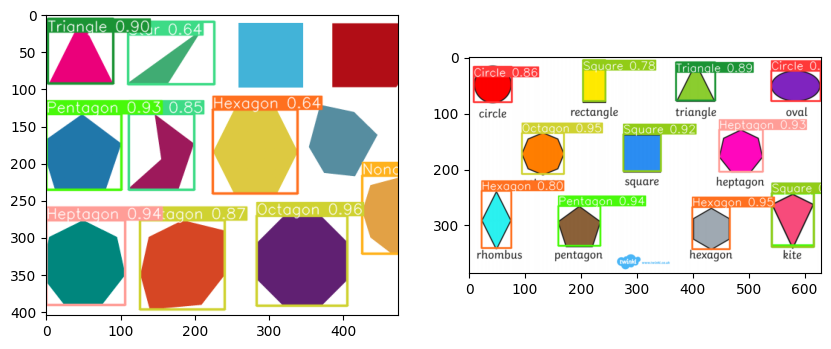

In [49]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

detect_path = f'{dataset_path}/runs/detect/'

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
image_paths = []
for folder in os.listdir(detect_path):
  if 'predict' in folder:
    folder_path = os.path.join(detect_path,folder)
    for im in os.listdir(folder_path):
      image_paths.append(os.path.join(folder_path,im))

for i, ax in enumerate(axes.flat):
      img = mpimg.imread(image_paths[i])
      ax.imshow(img)
plt.show()

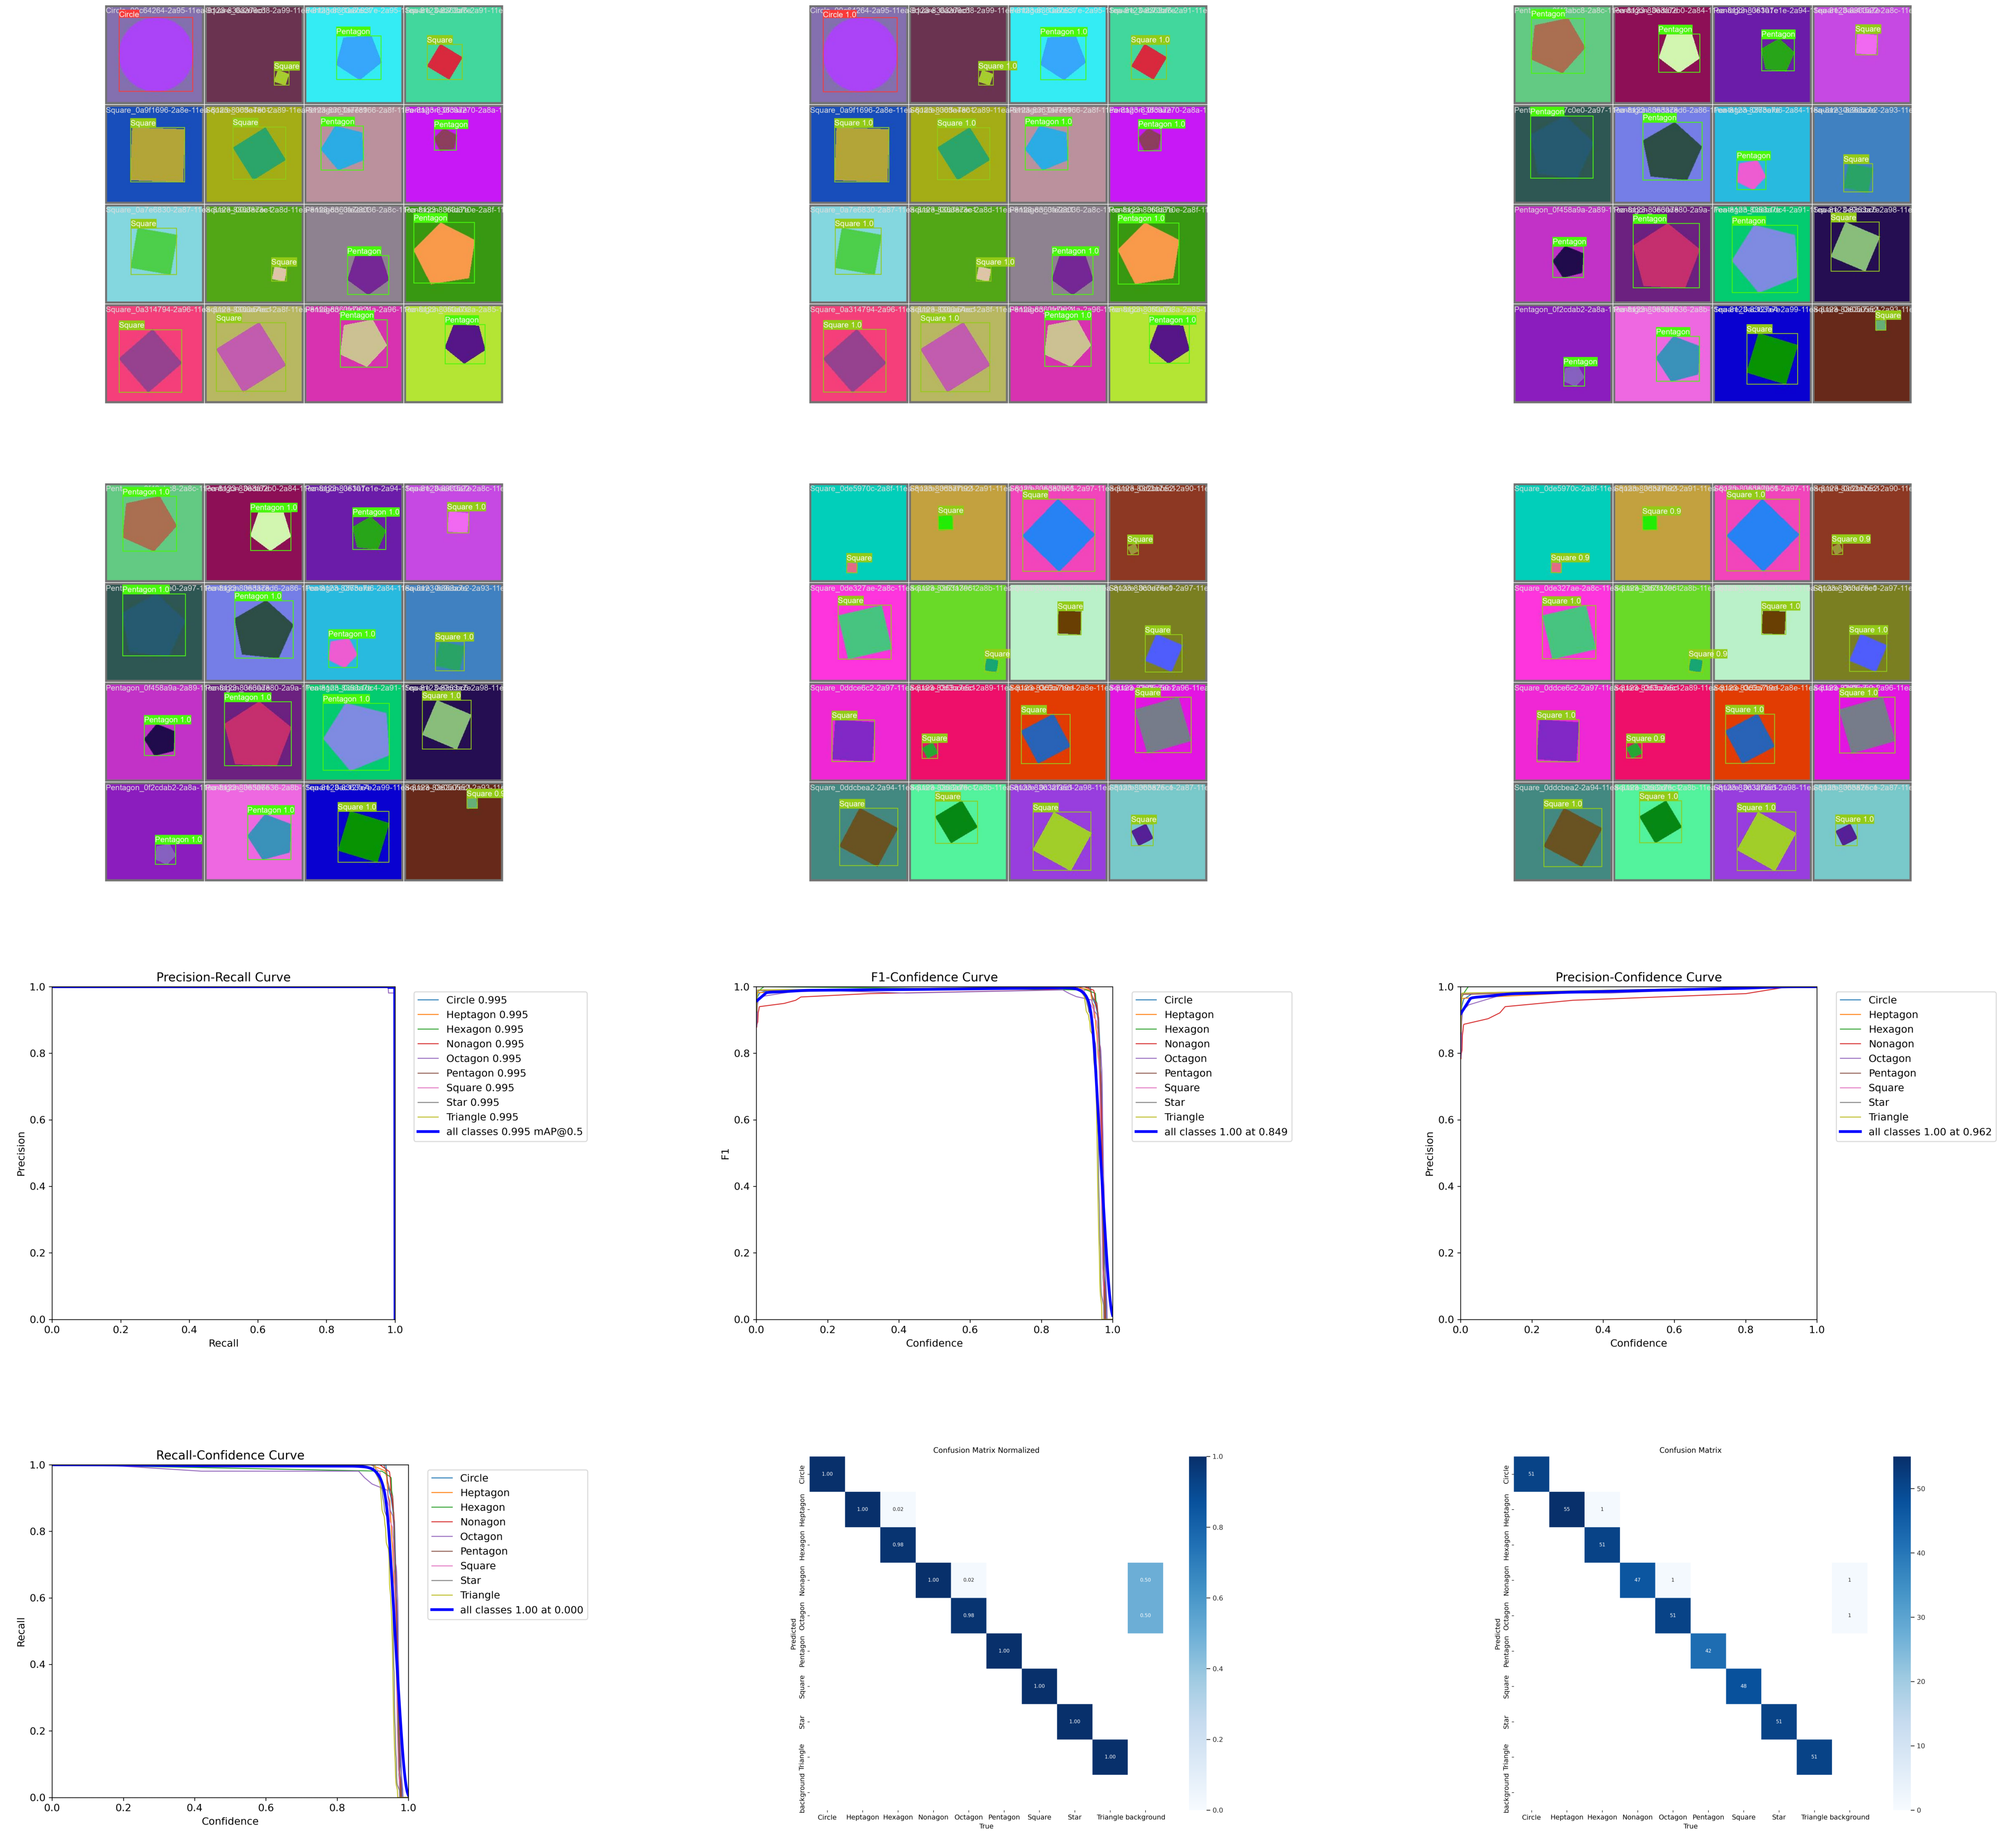

In [70]:
## Plotting some of the analtics produced by the model

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

val_path = f'{dataset_path}/runs/detect/val'

fig, axes = plt.subplots(4, 3, figsize=(50, 45),
                         gridspec_kw={'wspace': 0.1, 'hspace': 0.2})
image_paths = []
for image in os.listdir(val_path):
  image_paths.append(os.path.join(val_path, image))

for i, ax in enumerate(axes.flat):
      img = mpimg.imread(image_paths[i])
      ax.imshow(img)
      ax.axis('off')

plt.show()